# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`.  **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и полученные данные (подробности далее). 
* Если вы выполняете <b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">сложную часть</font></a></b>, то кроме `ipynb` прислать нужно также ноутбук, сконвертированный **в формате `html`**, который можно получить как `File -> Download as -> HTML`. **Внимательно проверьте, что plotly-графики в ней сохранились**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 80 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

import requests
from time import sleep
import json

ModuleNotFoundError: No module named 'plotly'


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

В данном задании вам нужно проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>.

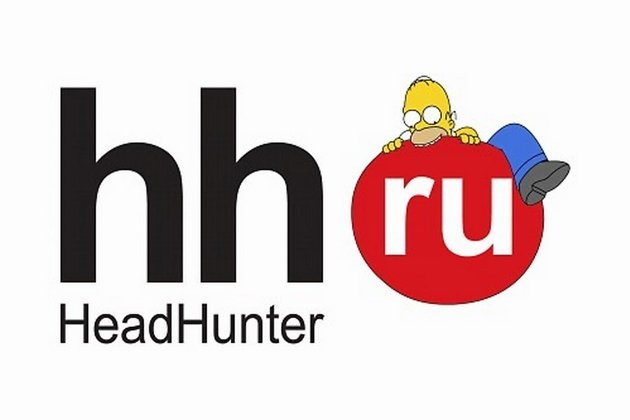

 ---
### Справка по работе с API.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер HeadHunter. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [2]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [3]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [4]:
data['items'][0]

{'id': '49423067',
 'premium': False,
 'name': 'Data Scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': None, 'to': 390000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2022-03-17T12:37:57+0300',
 'created_at': '2022-03-17T12:37:57+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=49423067',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/49423067?host=hh.ru',
 'alternate_url': 'https://hh.ru/vacancy/49423067',
 'relations': [],
 'employer': {'id': '2324020',
  'name': 'Точка',
  'url': 'https://api.hh.ru/employers/2324020',
  'alternate_url': 'https://hh.ru/employer/2324020',
  'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/3414734.jpeg',
   '90': 'https:/

Сколько всего найдено вакансий

In [5]:
data['found']

278

Количество страниц в результатах поиска

In [6]:
data['pages']

28

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [7]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,...,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,address.metro
0,49423067,False,Data Scientist,NaN,False,False,NaN,None,None,2022-03-17T12:37:57+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53929493,True,Data Scientist (CV+NLP),NaN,False,False,NaN,None,None,2022-03-16T12:35:21+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53947371,True,Data Scientist (Корпоративный бизнес),NaN,False,False,NaN,None,None,2022-03-16T17:25:13+0300,...,"Москва, Кутузовский проспект, 32к1",Кутузовская,Филевская,4.73,4,55.740544,37.534100,"[{'station_name': 'Кутузовская', 'line_name': ...",731097,NaN
3,53211742,False,Junior Data scientist/ Младший риск-аналитик,NaN,False,True,NaN,None,None,2022-03-16T11:16:44+0300,...,"Москва, улица 8 Марта, 1с12",Динамо,Замоскворецкая,2.34,2,55.789704,37.558212,"[{'station_name': 'Динамо', 'line_name': 'Замо...",1551673,NaN
4,53809111,False,Data scientist / Product analyst,NaN,False,False,NaN,None,None,2022-03-17T11:45:23+0300,...,"Москва, Нижняя Красносельская улица, 35с9",Бауманская,Арбатско-Покровская,3.17,3,55.772405,37.679040,"[{'station_name': 'Бауманская', 'line_name': '...",743543,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [8]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [9]:
vacancy_info

{'id': '49423067',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data Scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': None, 'to': 390000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'site': {'id': 'hh', 'name': 'hh.ru'},
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'fullDay', 'name': 'Полный день'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<p>Ищем специалиста по Data Science, чтобы строить и улучшать модели машинного обучения, которые помогут усовершенствовать наш продукт и внутренние процессы. Мы стремимся к тому, чтобы мы стали быстрее и удобнее для клиентов. И в этом нам нужна твоя помощь.</p> <p><stron

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например `аналитик данных`.

In [10]:
import time
URL = 'https://api.hh.ru/vacancies'
data_list = []
for job in ["Data Scientist","Data analyst", "Аналитик данных", "Специалист по данным"]:
    for page in range(0, 20):
        params = {
            'text': job,
            'area': 1,
            'page': page,
            'per_page': 100
        }

        req = requests.get(URL, params)
        data = json.loads(req.content.decode())
        data_list.append(data)
    time.sleep(1)
df = pd.DataFrame(data=data_list[0]['items'])
for item in data_list[1:]:
    df_tmp = pd.DataFrame(data=item['items'])
    df = df.append(df_tmp)

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [11]:
df_no_dup = df.drop_duplicates(subset=['id']).reset_index(drop=True)
df_no_dup.head()

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,alternate_url,relations,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary
0,49423067,False,Data Scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 390000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/49423067,[],"{'id': '2324020', 'name': 'Точка', 'url': 'htt...",{'requirement': 'Есть опыт работы с методами м...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
1,53929493,True,Data Scientist (CV+NLP),"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/53929493,[],"{'id': '3529', 'name': 'Сбербанк', 'url': 'htt...",{'requirement': 'Высшее техническое/математиче...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
2,53947371,True,Data Scientist (Корпоративный бизнес),"{'id': '3529-3529-data', 'name': 'Сбер. Data S...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Кутузовский прос...",...,https://hh.ru/vacancy/53947371,[],"{'id': '3529', 'name': 'Сбербанк', 'url': 'htt...",{'requirement': 'Диплом в области компьютерных...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
3,53211742,False,Junior Data scientist/ Младший риск-аналитик,None,False,True,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица 8 Марта', ...",...,https://hh.ru/vacancy/53211742,[],"{'id': '1039977', 'name': 'Pay P.S.', 'url': '...","{'requirement': 'Умение работать в команде, от...",None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
4,53809111,False,Data scientist / Product analyst,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 200000, 'to': 250000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Нижняя Красносел...",...,https://hh.ru/vacancy/53809111,[],"{'id': '2652595', 'name': 'Bip.ru', 'url': 'ht...",{'requirement': 'Опыт работы аналитиком/продук...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False


Загрузите подробное описание каждой вакансии и создайте удобную таблицу данных.

In [16]:
vacancy = df_no_dup['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'
req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())
idx = 0
rows = 2000
vacancy_df = pd.json_normalize(vacancy_info)
for i in range(1,rows):
    vac_item = df_no_dup['id'].iloc[i]
    vacancy_url = f'https://api.hh.ru/vacancies/{vac_item}'
    
    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    vacancy_df = vacancy_df.append(pd.json_normalize(vacancy_info))
    idx+=1
    if(idx==100):
        print('Read 100')
        idx=0
    time.sleep(0.8)
    
    

Read 100
Read 100
Read 100
Read 100
Read 100
Read 100
Read 100
Read 100
Read 100
Read 100
Read 100
Read 100
Read 100
Read 100
Read 100
Read 100
Read 100
Read 100
Read 100


In [141]:
vacancy_df

,id,premium,relations,name,insider_interview,response_letter_required,address,allow_messages,department,contacts,...,vacancy_constructor_template.top_picture.width,vacancy_constructor_template.top_picture.path,vacancy_constructor_template.top_picture.blurred_path,vacancy_constructor_template.bottom_picture,insider_interview.id,insider_interview.url,vacancy_constructor_template.bottom_picture.height,vacancy_constructor_template.bottom_picture.width,vacancy_constructor_template.bottom_picture.path,vacancy_constructor_template.bottom_picture.blurred_path
0,49423067,False,[],Data Scientist,None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,53929493,True,[],Data Scientist (CV+NLP),None,False,None,False,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,53947371,True,[],Data Scientist (Корпоративный бизнес),None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,53211742,False,[],Junior Data scientist/ Младший риск-аналитик,None,True,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,53809111,False,[],Data scientist / Product analyst,None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,53584851,False,[],Аналитик,None,False,None,False,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,53493865,False,[],Junior Analyst / Младший аналитик данных,None,True,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,52296952,False,[],Аналитик,None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,53557479,False,[],Аналитик,None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
vacancy_df.to_excel("vacancy_info.xlsx")

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [19]:
vacancy_df.count()['id']

2000

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [20]:
def GetKeySkills(vacancy_df_no_nan):
    skills = dict()
    for iter_item in range(vacancy_df_no_nan.shape[0]):
        for skill in vacancy_df_no_nan.iloc[iter_item]['key_skills']:
            skill_val = list(skill.values())[0]
            if skill_val not in skills.keys():
                skills[skill_val] = 1
            else:
                skills[skill_val] += 1
    skills_sroted = dict(sorted(skills.items(), key=lambda item: item[1], reverse=True))
    return pd.DataFrame.from_dict(skills_sroted, orient='index')

Text(0.5, 1.0, 'Необходимые навыки')

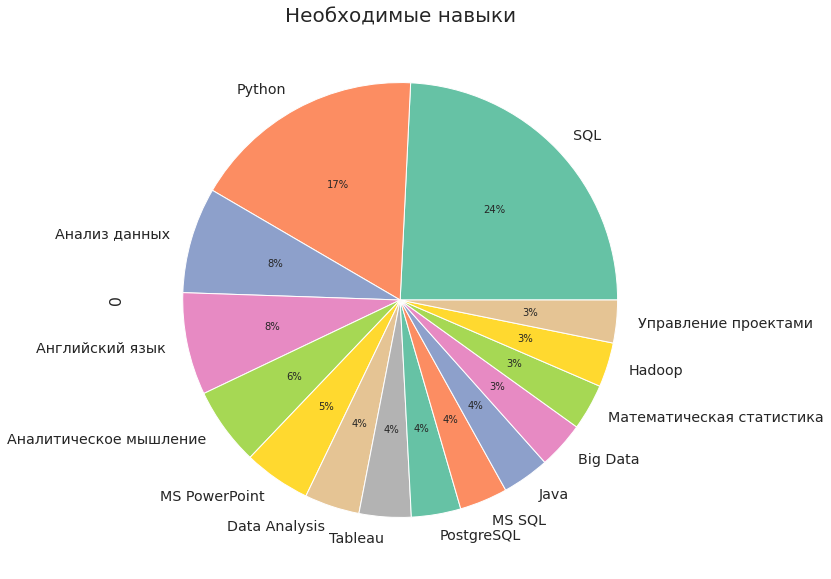

In [287]:
vacancy_df_no_nan = vacancy_df.dropna(subset=['key_skills'])
df_skills = GetKeySkills(vacancy_df_no_nan)

df_skills.head(15).plot.pie(subplots=True, figsize=(15, 10), autopct='%1.0f%%', legend=None)
plt.title('Необходимые навыки', fontsize=20)

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. 

In [22]:
def GetSalaryData(vacancy_df_no_nan_salary,from_or_to, salary_from_list, salary_iter_list, salary_EUR_cur, salary_USD_cur, salary_with_gross):
    for i in range(vacancy_df_no_nan_salary.shape[0]):
        if(vacancy_df_no_nan_salary.iloc[i]['salary.gross']):
            salary_with_gross.append(vacancy_df_no_nan_salary.iloc[i])
        if(vacancy_df_no_nan_salary.iloc[i]['salary.currency'] == 'EUR'):
            salary_EUR_cur.append(vacancy_df_no_nan_salary.iloc[i][f'salary.{from_or_to}'])
        if(vacancy_df_no_nan_salary.iloc[i]['salary.currency'] == 'USD'):
            salary_USD_cur.append(vacancy_df_no_nan_salary.iloc[i][f'salary.{from_or_to}'])
        if(vacancy_df_no_nan_salary.iloc[i]['salary.currency'] == 'RUR'):
            salary_from_list.append(vacancy_df_no_nan_salary.iloc[i][f'salary.{from_or_to}'])
            salary_iter_list.append(vacancy_df_no_nan_salary.iloc[i])

In [23]:
salary_from_list = []
salary_iter_list = []
salary_EUR_cur = []
salary_USD_cur = []
salary_with_gross = []
vacancy_df_no_nan_salary = vacancy_df.dropna(subset=['salary.from'])
GetSalaryData(vacancy_df_no_nan_salary, 'from', salary_from_list, salary_iter_list, salary_EUR_cur, salary_USD_cur, salary_with_gross)

In [24]:
salary_to_list = []
salary_to_iter_list = []
salary_to_EUR_cur = []
salary_to_USD_cur = []
salary_to_with_gross = []
vacancy_df_no_nan_salary = vacancy_df.dropna(subset=['salary.to'])
GetSalaryData(vacancy_df_no_nan_salary, 'to', salary_to_list, salary_to_iter_list, salary_to_EUR_cur, salary_to_USD_cur, salary_to_with_gross)

Text(0.5, 1.0, 'Распределение зарплаты в валютах')

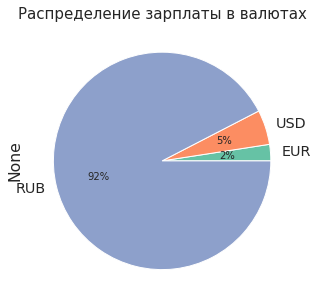

In [289]:
sal_distr = {'EUR': len(salary_EUR_cur), 'USD': len(salary_USD_cur), 'RUB': len(salary_from_list)}
ser = pd.Series(data=sal_distr, index=['EUR', 'USD', 'RUB'])
ser.plot.pie(subplots=True, figsize=(10, 5), autopct='%1.0f%%', legend=None)
plt.title('Распределение зарплаты в валютах', fontsize=15)

<Figure size 1080x720 with 0 Axes>

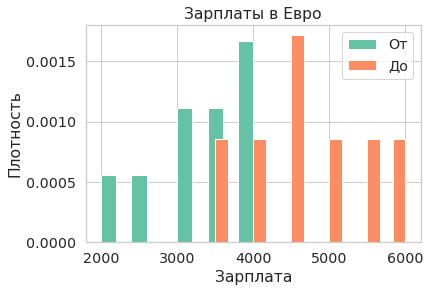

<Figure size 1080x720 with 0 Axes>

In [42]:
from matplotlib.patches import Rectangle

plt.hist(salary_EUR_cur, density=True)
plt.ylabel('Плотность')
plt.xlabel('Зарплата');

plt.hist(salary_to_EUR_cur, density=True, bins=15)
plt.ylabel('Плотность')
plt.xlabel('Зарплата');
plt.title('Зарплаты в Евро')

labels = ["От","До"]

plt.legend(labels=labels)
plt.figure(figsize=(15,10))

<Figure size 432x288 with 0 Axes>

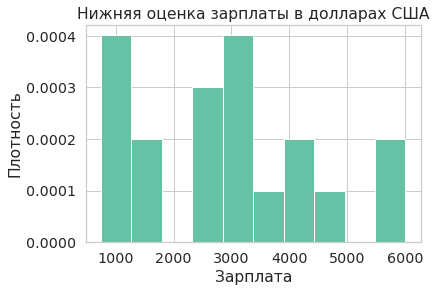

<Figure size 432x288 with 0 Axes>

In [48]:
plt.hist(salary_USD_cur, density=True)
plt.ylabel('Плотность')
plt.xlabel('Зарплата');
plt.title('Нижняя оценка зарплаты в долларах США')
plt.figure()

<Figure size 432x288 with 0 Axes>

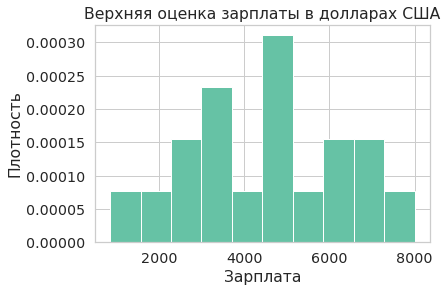

<Figure size 432x288 with 0 Axes>

In [51]:
plt.hist(salary_to_USD_cur, density=True)
plt.ylabel('Плотность')
plt.xlabel('Зарплата');
plt.title('Верхняя оценка зарплаты в долларах США')
plt.figure()

<Figure size 1080x720 with 0 Axes>

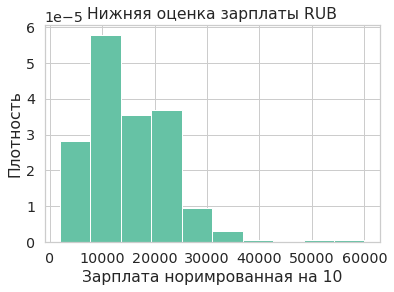

<Figure size 1080x720 with 0 Axes>

In [59]:
salary_from_list_norm = [el / 10 for el in salary_from_list]
plt.hist(salary_from_list_norm, density=True, bins=10)

plt.ylabel('Плотность')
plt.xlabel('Зарплата норимрованная на 10');

plt.title('Нижняя оценка зарплаты RUB')
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

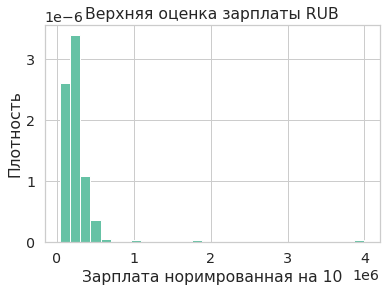

<Figure size 1080x720 with 0 Axes>

In [62]:
salary_to_list_norm = [el / 10 for el in salary_to_list]
plt.hist(salary_to_list, density=True, bins=30)

plt.ylabel('Плотность')
plt.xlabel('Зарплата норимрованная на 10');

plt.title('Верхняя оценка зарплаты RUB')
plt.figure(figsize=(15,10))

In [63]:
sal_gross = []
for item in salary_with_gross:
    for it in salary_iter_list:
        if(it['id']==item['id']):
            sal_gross.append(it)

sal_with_gross = []
for sal in sal_gross:
    sal_with_gross.append(sal['salary.from'])
    

<Figure size 1080x720 with 0 Axes>

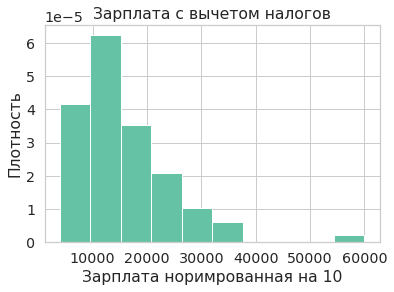

<Figure size 1080x720 with 0 Axes>

In [64]:
sal_with_gross = [el / 10 for el in sal_with_gross]
plt.hist(sal_with_gross, density=True, bins=10)

plt.ylabel('Плотность')
plt.xlabel('Зарплата норимрованная на 10');

plt.title('Зарплата с вычетом налогов')
plt.figure(figsize=(15,10))

Выводы:

По итогам исследования, можно увидеть, что для аналитиков, самый распространненный навык - это SQL,Python, и сам АД.
Можем видеть, что большую часть зарплаты платят в рублях, и гораздо меньше в долларах и евро. Также, видим диапозон зарплат: какую минимальную зарплату готовы платить и максимальную

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую.

In [66]:
import time
URL = 'https://api.hh.ru/vacancies'
data_list_cour = []
for page in range(0, 20):
    params = {
        'text': 'Курьер',
        'area': 1,
        'page': page,
        'per_page': 100
    }

    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    data_list_cour.append(data)
    time.sleep(0.5)
df_cour = pd.DataFrame(data=data_list_cour[0]['items'])
for item in data_list_cour[1:]:
    df_tmp = pd.DataFrame(data=item['items'])
    df_cour = df_cour.append(df_tmp)

In [68]:
vacancy = df_cour['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'
req = requests.get(vacancy_url)
vacancy_cur_info = json.loads(req.content.decode())
rows = df_cour.shape[0]
vacancy_cur_df = pd.json_normalize(vacancy_cur_info)
for i in range(1,rows):
    vac_cur_item = df_cour['id'].iloc[i]
    vacancy_url = f'https://api.hh.ru/vacancies/{vac_cur_item}'
    
    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    vacancy_cur_df = vacancy_cur_df.append(pd.json_normalize(vacancy_info))
    time.sleep(0.7)
    

In [69]:
vacancy_cur_df.count()['id']

1998

Text(0.5, 1.0, 'Необходимые навыки')

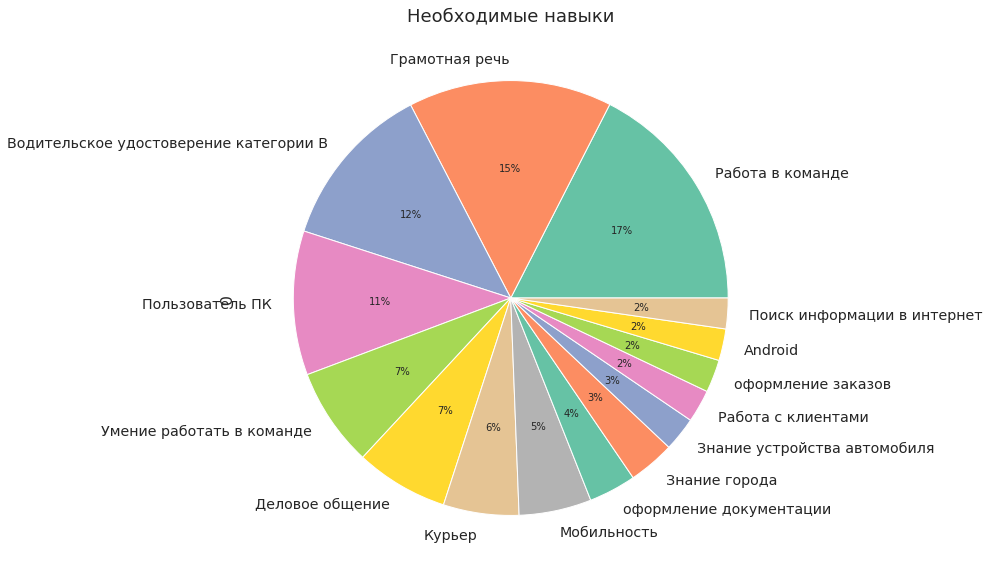

In [290]:
vacancy_cur_df_no_nan = vacancy_cur_df.dropna(subset=['key_skills'])
df_cur_skills = GetKeySkills(vacancy_cur_df_no_nan)

df_cur_skills.head(15).plot.pie(subplots=True, figsize=(15, 10), autopct='%1.0f%%', legend=None)
plt.title('Необходимые навыки', fontsize=18)

In [72]:
salary_cur_from_list = []
salary_cur_iter_list = []
salary_cur_EUR_cur = []
salary_cur_USD_cur = []
salary_cur_with_gross = []
vacancy_cur_df_no_nan_salary = vacancy_cur_df.dropna(subset=['salary.from'])
GetSalaryData(vacancy_cur_df_no_nan_salary, 'from', salary_cur_from_list, salary_cur_iter_list, salary_cur_EUR_cur, salary_cur_USD_cur, salary_cur_with_gross)

In [77]:
vacancy_cur_df_to_no_nan_salary = vacancy_cur_df.dropna(subset=['salary.to'])
salary_cur_to_list = []
salary_cur_to_iter_list = []
salary_cur_to_EUR_cur = []
salary_cur_to_USD_cur = []
salary_cur_to_with_gross = []
GetSalaryData(vacancy_cur_df_to_no_nan_salary, 'to', salary_cur_to_list, salary_cur_to_iter_list, salary_cur_to_EUR_cur, salary_cur_to_USD_cur, salary_cur_to_with_gross)

Text(0.5, 1.0, 'Нижняя оценка зарплаты RUB')

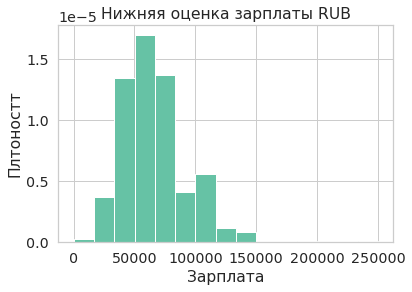

In [291]:
plt.hist(salary_cur_from_list, density=True, bins=15)

plt.ylabel('Плтоность')
plt.xlabel('Зарплата');

plt.title('Нижняя оценка зарплаты RUB')

Text(0.5, 1.0, 'Верхняя оценка зарплаты RUB')

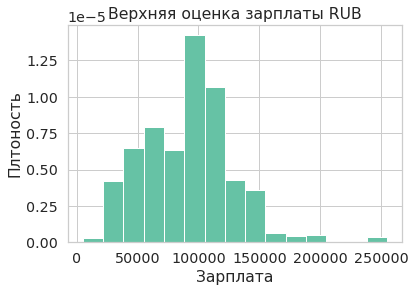

In [292]:
plt.hist(salary_cur_to_list, density=True, bins=15)

plt.ylabel('Плтоность')
plt.xlabel('Зарплата');

plt.title('Верхняя оценка зарплаты RUB')

In [75]:
sal_cur_gross = []
for item in salary_cur_with_gross:
    for it in salary_cur_iter_list:
        if(it['id']==item['id']):
            sal_cur_gross.append(it)
    for it in salary_cur_to_iter_list:
        

sal_cur_with_gross = []
for sal in sal_cur_gross:
    sal_cur_with_gross.append(sal['salary.from'])
    

<Figure size 1080x720 with 0 Axes>

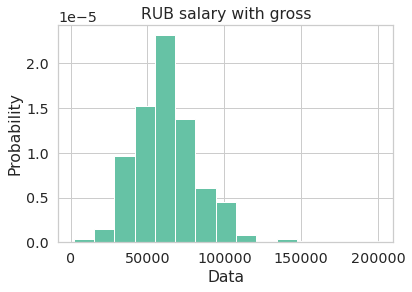

<Figure size 1080x720 with 0 Axes>

In [76]:
plt.hist(sal_cur_with_gross, density=True, bins=15)

plt.ylabel('Плтоность')
plt.xlabel('Зарплата');

plt.title('Зарплата с вычетом налогов')
plt.figure(figsize=(15,10))

Выводы:

По итогам исследования, можно увидеть самые необходимые навыки для работы курьером: Работа в команде, граммотная речь, водительские права. Зарплаты же у курьеров, на порядок меньше чем у дата саинтистов, это можно пронаблюдать из гистограмм. 


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, для этого используйте библиотеку plotly. В частности, постройте распределений вакансий на карте.

Для построения последних двух графиков вам могут понадобиться <a target="_blank" href="https://ru.wikipedia.org/wiki/Список_станций_Московского_метрополитена">внешние данные</a>.


In [111]:
import plotly.express as px
exp_req = dict()
for item in vacancy_df['experience.name']:
    if(item not in exp_req):
        exp_req[item] = 1
    else:
        exp_req[item] += 1
        
exp_req_sroted = dict(sorted(exp_req.items(), key=lambda item: item[1], reverse=True))
exp_df = pd.DataFrame(list(exp_req_sroted.items()), columns=['req_exp','amount'])

In [112]:
fig = px.pie(exp_df, values='amount', names='req_exp', title='Work experience')
fig.show()

In [98]:
pip install plotly

     |████████████████████████████████| 27.7 MB 3.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [123]:
companies = dict()
for item in vacancy_df['employer.name']:
    if(item not in companies):
        companies[item] = 1
    else:
        companies[item] += 1

companies_sroted = dict(sorted(companies.items(), key=lambda item: item[1], reverse=True))
companies_df = pd.DataFrame(list(companies_sroted.items()), columns=['company','amount'])

In [131]:
import plotly.graph_objects as go
top_am = 15

colors = ['darkblue',] * top_am
colors[0] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x=companies_df.head(top_am)['company'],
    y=companies_df.head(top_am)['amount'],
    marker_color=colors
)])
fig.update_layout(title_text='Топ 15 работодателей')

In [275]:
vacny_df_no_nan_metro = vacancy_df.dropna(subset=['address.metro.station_name','address.metro.line_name','address.metro.lat', 'address.metro.lng'])

vacny_df_no_nan_metro.shape[0]
vac_by_id = vacny_df_no_nan_metro[['id', 'address.metro.station_name','address.metro.line_name','address.metro.lat', 'address.metro.lng', 'address.metro.station_id']]

vac_by_id_res = vac_by_id.reset_index()
vac_grouped = vac_by_id_res.groupby(['address.metro.station_name','address.metro.line_name','address.metro.station_id']).count().reset_index()
for item in vac_grouped['address.metro.station_id']:
    for idx in vac_by_id_res['address.metro.station_id']:
        if(item==idx):
            vac_grouped.loc[vac_grouped['address.metro.station_id']==item, 'address.metro.lat'] = vac_by_id_res.loc[vac_by_id_res['address.metro.station_id']==idx, 'address.metro.lat'].values[0]
            vac_grouped.loc[vac_grouped['address.metro.station_id']==item, 'address.metro.lng'] = vac_by_id_res.loc[vac_by_id_res['address.metro.station_id']==idx, 'address.metro.lng'].values[0]

In [276]:
vac_grouped.head()
vac_grouped.rename(columns={"address.metro.station_name": "Название станции", "address.metro.line_name": "Название ветки", "id":"Количество предложений", "address.metro.lat":"Широта", "address.metro.lng":"Долгота"})

,address.metro.station_name,address.metro.line_name,address.metro.station_id,index,id,address.metro.lat,address.metro.lng
0,Авиамоторная,Калининская,8.1,2,2,55.751933,37.717444
1,Автозаводская,Замоскворецкая,2.2,4,4,55.706634,37.657008
2,Академическая,Калужско-Рижская,6.3,3,3,55.687147,37.572300
3,Алексеевская,Калужско-Рижская,6.8,7,7,55.807794,37.638699
4,Алтуфьево,Серпуховско-Тимирязевская,9.9,2,2,55.899034,37.586473


In [294]:
data_science = vacny_df_no_nan_metro
df = data_science.dropna(subset=['address.metro.station_name','address.metro.line_name','address.metro.lat', 'address.metro.lng'])
counter=list()
stations = df['address.metro.station_name'].tolist()
for station in df['address.metro.station_name']:
    counter.append(stations.count(station))
df.insert(0,'count_station', pd.Series(counter))
fig = px.scatter_mapbox(df, lat='address.metro.lat', lon='address.metro.lng', color='address.metro.line_name',
                        size=pd.Series(counter), mapbox_style ='stamen-terrain')

fig.show()

Какие выводы можно сделать из построенных графиков?

По итогам исследования, выяснилось, что больше всего вакансий, на станциях: Технопарк,Белорусская,Бауманская. Также, можем увидеть, что самый топовый работодатель - это Сбербанк, и самый часто требуемый опыт работы - это от 1 до 3 лет.